In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import machine_learning_modules as ml
import warnings
warnings.filterwarnings('ignore')

In [2]:
filtered_df = pd.read_csv("filtered_df.csv")
filtered_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


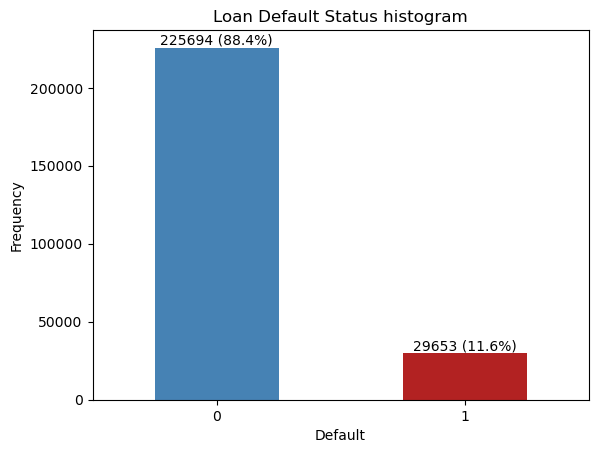

In [3]:
ml.checking_class_dist(filtered_df, 'Default', 'Loan Default Status histogram')

In [15]:
filtered_df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [13]:
age_default = filtered_df.groupby(['Age']).agg(total_default=('Default', lambda x: (x == 1).sum())).reset_index()
total_defaults = age_default['total_default'].sum()
age_default['percentage'] = round(age_default['total_default'] / total_defaults * 100, 2)
age_default

,Age,total_default,percentage
0,18,1084,3.66
1,19,1096,3.70
2,20,1086,3.66
3,21,992,3.35
4,22,1100,3.71
5,23,887,2.99
6,24,943,3.18
7,25,912,3.08
8,26,887,2.99
9,27,905,3.05


In [25]:
education_default = filtered_df.groupby(['InterestRate', 'Age']).agg(total_default=('Default', lambda x: (x == 1).sum())).reset_index()
total_defaults = education_default['total_default'].sum()
education_default['percentage'] = round(education_default['total_default'] / total_defaults * 100, 2)
education_default

,InterestRate,Age,total_default,percentage
0,2.0,18,0,0.0
1,2.0,24,0,0.0
2,2.0,25,0,0.0
3,2.0,26,1,0.0
4,2.0,30,0,0.0
...,...,...,...,...
105454,25.0,64,1,0.0
105455,25.0,65,0,0.0
105456,25.0,67,0,0.0
105457,25.0,68,0,0.0


In [37]:
education_default[education_default['total_default'] > 4]

,InterestRate,Age,total_default,percentage
38393,10.38,27,5,0.02
66898,16.59,20,5,0.02
76749,18.74,22,5,0.02
81267,19.73,20,5,0.02
90277,21.69,19,6,0.02
91477,21.95,26,5,0.02
97551,23.28,22,5,0.02


In [15]:
marital_status_default = filtered_df.groupby(['MaritalStatus']).agg(total_default=('Default', lambda x: (x == 1).sum())).reset_index()
total_defaults = result['total_default'].sum()
marital_status_default['percentage'] = round(marital_status_default['total_default'] / total_defaults * 100, 2)
marital_status_default

,MaritalStatus,total_default,percentage
0,Divorced,10657,35.94
1,Married,8869,29.91
2,Single,10127,34.15


In [17]:
employment_type_default = filtered_df.groupby(['EmploymentType']).agg(total_default=('Default', lambda x: (x == 1).sum())).reset_index()
total_defaults = result['total_default'].sum()
employment_type_default['percentage'] = round(employment_type_default['total_default'] / total_defaults * 100, 2)
employment_type_default

,EmploymentType,total_default,percentage
0,Full-time,6024,20.31
1,Part-time,7677,25.89
2,Self-employed,7302,24.62
3,Unemployed,8650,29.17


In [7]:
#what percentae 
# Group by 'sex' and 'married', and count 'default' occurrences
result = filtered_df.groupby(['Education', 'MaritalStatus']).agg(total_default=('Default', lambda x: (x == 1).sum())).reset_index()
# Calculate the total defaults for all groups
total_defaults = result['total_default'].sum()
# Calculate the percentage of defaults for each group
result['percentage'] = round(result['total_default'] / total_defaults * 100, 2)
result

,Education,MaritalStatus,total_default,percentage
0,Bachelor's,Divorced,2750,9.27
1,Bachelor's,Married,2356,7.95
2,Bachelor's,Single,2683,9.05
3,High School,Divorced,2967,10.01
4,High School,Married,2441,8.23
5,High School,Single,2822,9.52
6,Master's,Divorced,2520,8.50
7,Master's,Married,2063,6.96
8,Master's,Single,2325,7.84
9,PhD,Divorced,2420,8.16


In [9]:
result_ = filtered_df.groupby(['Education', 'EmploymentType']).agg(total_default=('Default', lambda x: (x == 1).sum())).reset_index()
# Calculate the total defaults for all groups
total_defaults = result['total_default'].sum()
# Calculate the percentage of defaults for each group
result_['percentage'] = round(result_['total_default'] / total_defaults * 100, 2)
result_

,Education,EmploymentType,total_default,percentage
0,Bachelor's,Full-time,1629,5.49
1,Bachelor's,Part-time,2051,6.92
2,Bachelor's,Self-employed,1905,6.42
3,Bachelor's,Unemployed,2204,7.43
4,High School,Full-time,1642,5.54
5,High School,Part-time,2100,7.08
6,High School,Self-employed,2081,7.02
7,High School,Unemployed,2407,8.12
8,Master's,Full-time,1375,4.64
9,Master's,Part-time,1811,6.11


Unmarried Male with no dependant has a significantly high probability of default 